<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-01-16 14:34:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.3MB/s    in 2.7s    

2025-01-16 14:34:13 (56.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_609/1600193691.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_job_sat = df_cleaned.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()


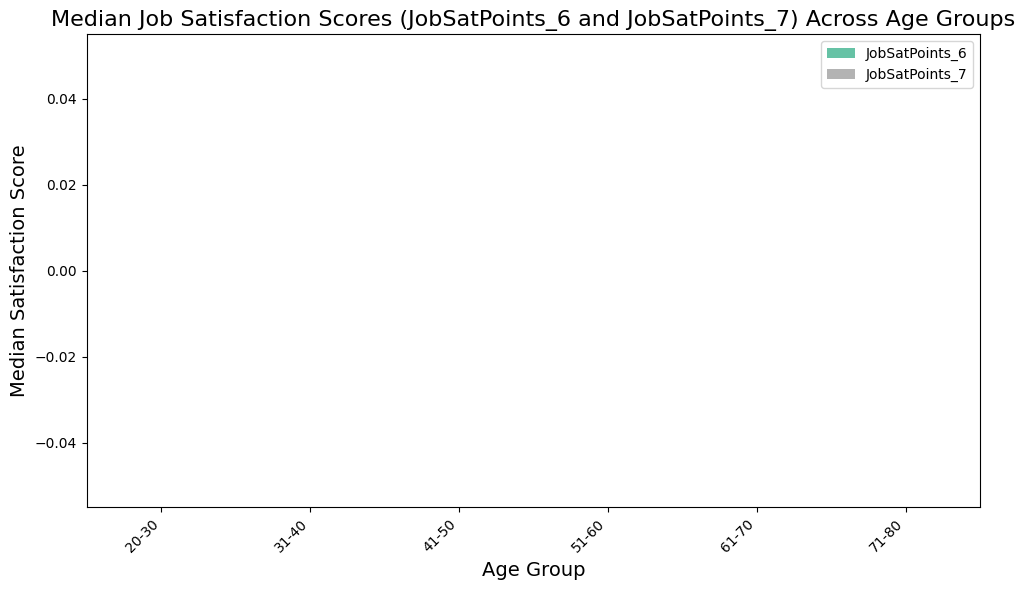

In [8]:


# Step 1: Clean the data - ensure 'Age' is numeric and drop rows with missing 'Age' values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, invalid entries become NaN
df_cleaned = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])  # Drop rows with NaN in relevant columns

# Step 2: Create age groups (e.g., 20-30, 31-40, etc.)
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the age ranges
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Step 3: Calculate the median JobSatPoints_6 and JobSatPoints_7 for each age group
age_group_job_sat = df_cleaned.groupby('AgeGroup')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 4: Plot the stacked bar chart
ax = age_group_job_sat.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Customize the plot
plt.title('Median Job Satisfaction Scores (JobSatPoints_6 and JobSatPoints_7) Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Median Satisfaction Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()




##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_609/1706473953.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


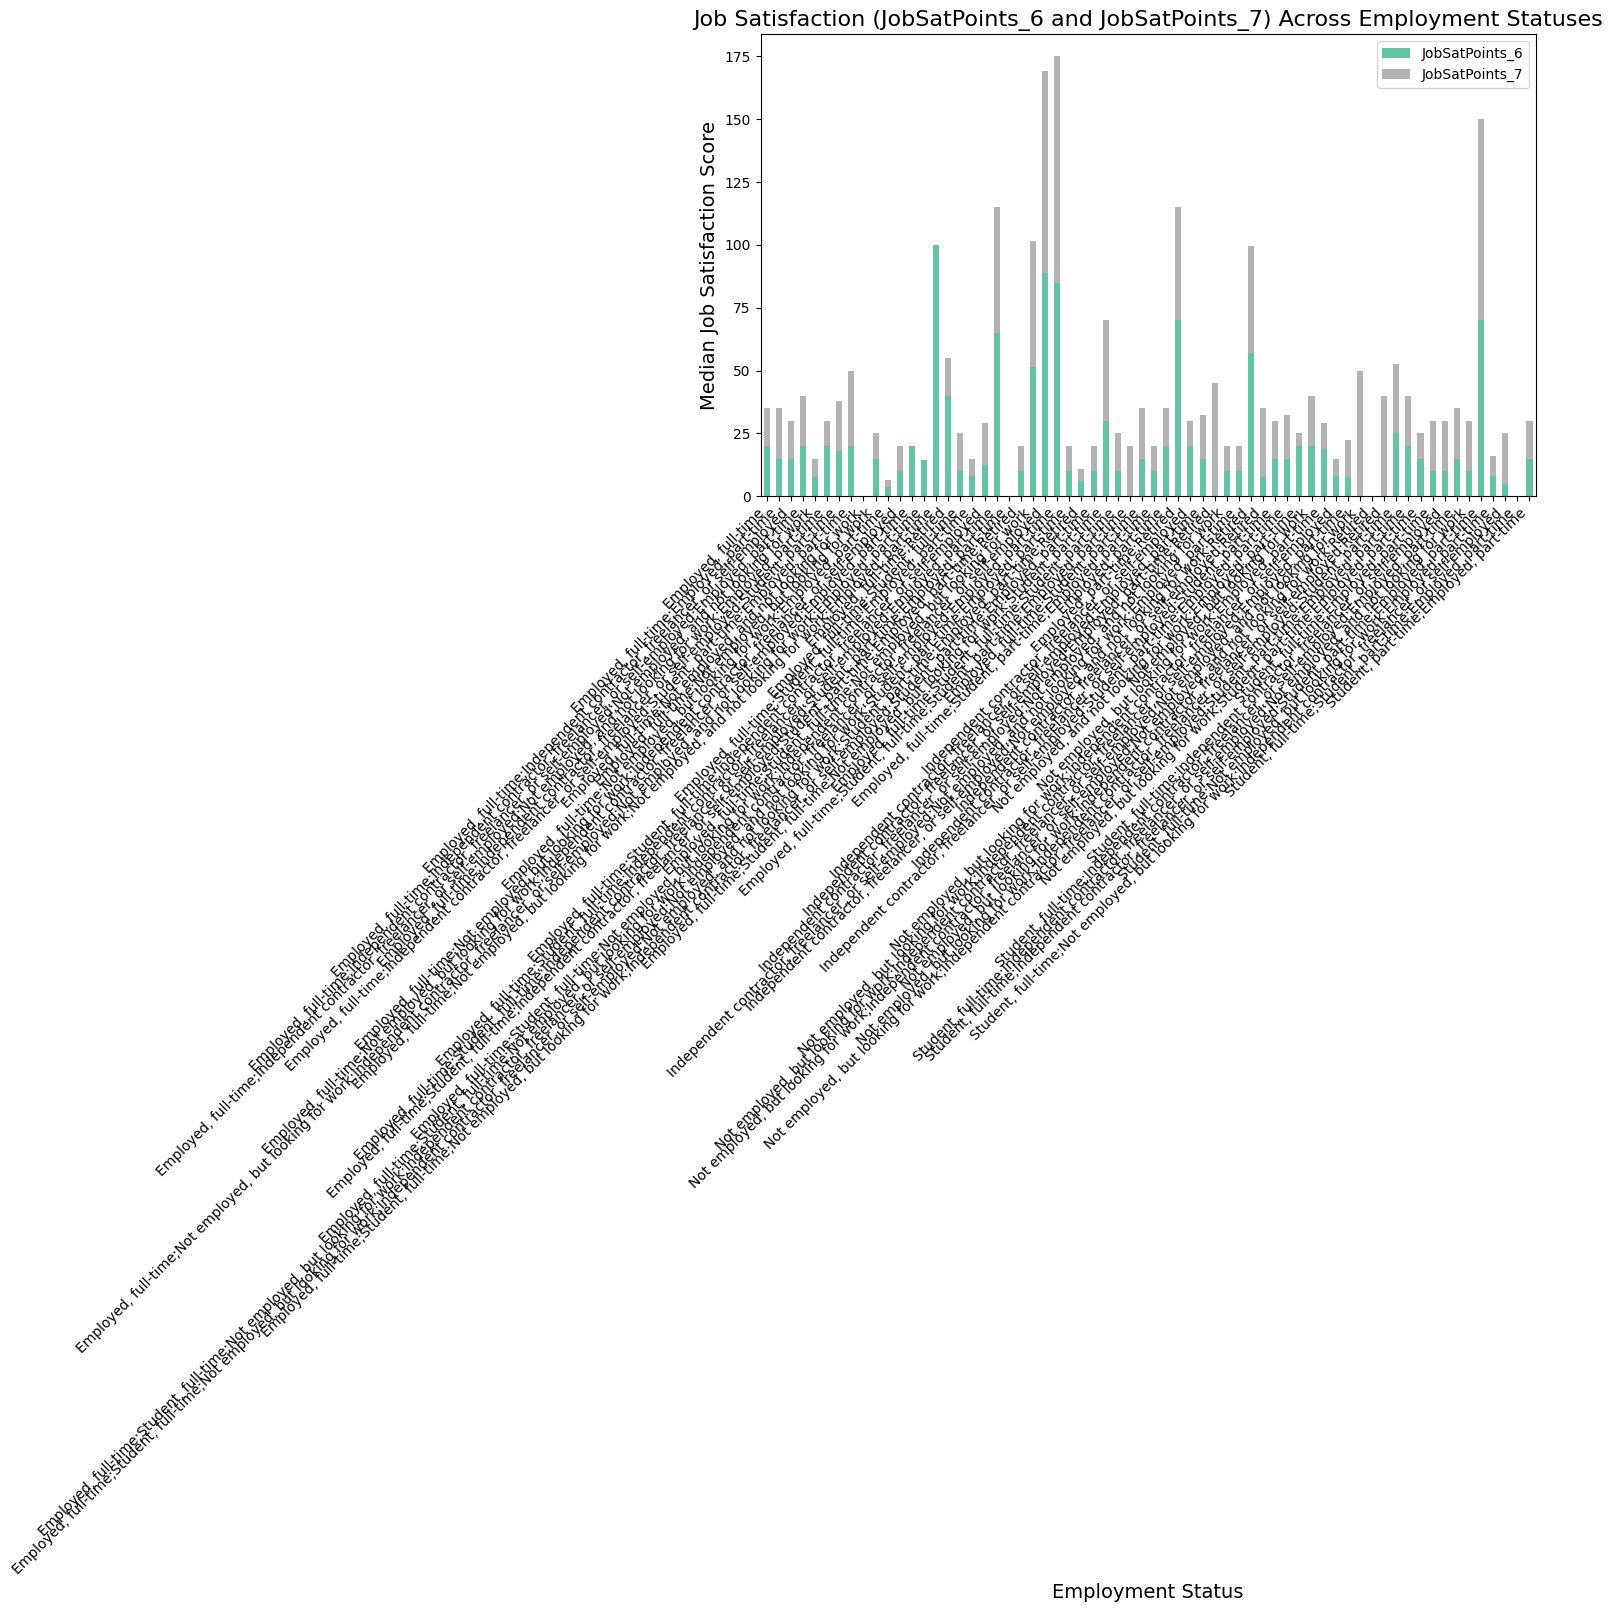

In [9]:
##Write your code here

# Step 1: Clean the data - Remove rows with missing values in Employment and JobSatPoints_6, JobSatPoints_7
df_cleaned = df.dropna(subset=['Employment', 'JobSatPoints_6', 'JobSatPoints_7'])

# Step 2: Group the data by Employment type and calculate the median JobSatPoints_6 and JobSatPoints_7 for each group
employment_job_sat = df_cleaned.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 3: Create a stacked bar chart
ax = employment_job_sat.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Step 4: Customize the plot
plt.title('Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) Across Employment Statuses', fontsize=16)
plt.xlabel('Employment Status', fontsize=14)
plt.ylabel('Median Job Satisfaction Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


Number of respondents aged 30-35: 0
ConvertedCompYearly    0
JobSatPoints_6         0
dtype: int64
Empty DataFrame
Columns: [Age, ConvertedCompYearly, JobSatPoints_6]
Index: []
Number of rows after cleaning: 0
No data available after cleaning.


IndexError: index 0 is out of bounds for axis 0 with size 0

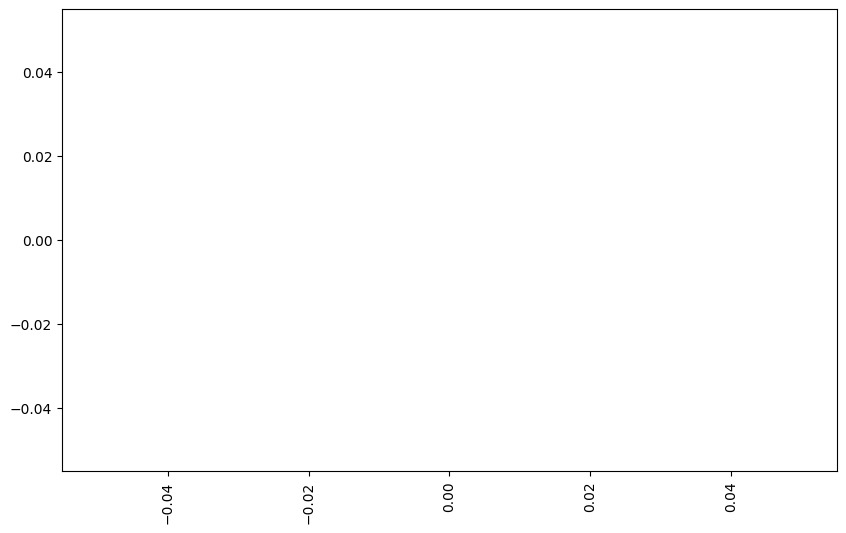

In [12]:
# Check the number of respondents aged between 30 and 35
df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]
print(f"Number of respondents aged 30-35: {len(df_filtered)}")

# Check the columns for missing values
print(df_filtered[['ConvertedCompYearly', 'JobSatPoints_6']].isnull().sum())

# Check the first few rows of the filtered data
print(df_filtered[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].head())

# Check if the dataframe is empty after removing rows with missing values
df_cleaned = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])
print(f"Number of rows after cleaning: {len(df_cleaned)}")

# If there's data left, calculate the median compensation by satisfaction level
if len(df_cleaned) > 0:
    age_group_compensation = df_cleaned.groupby('JobSatPoints_6')['ConvertedCompYearly'].median()
    print(age_group_compensation)
else:
    print("No data available after cleaning.")
    

# Step 2: Clean the data by removing rows with missing values in relevant columns
df_cleaned = df_filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 3: Calculate the median compensation for each job satisfaction level
age_group_compensation = df_cleaned.groupby('JobSatPoints_6')['ConvertedCompYearly'].median()

# Step 4: Create a stacked bar chart
# Since this is just median compensation, we will visualize it against JobSatPoints_6
ax = age_group_compensation.plot(kind='bar', stacked=False, figsize=(10, 6), color='skyblue')

# Step 5: Customize the plot
plt.title('Compensation and Job Satisfaction (JobSatPoints_6) for Respondents Aged 30-35', fontsize=16)
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)', fontsize=14)
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_609/1429132369.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_compensation = df_cleaned.groupby('AgeGroup')['ConvertedCompYearly'].median()
/tmp/ipykernel_609/1429132369.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_satisfaction = df_cleaned.groupby('AgeGroup')['JobSatPoints_6'].median()


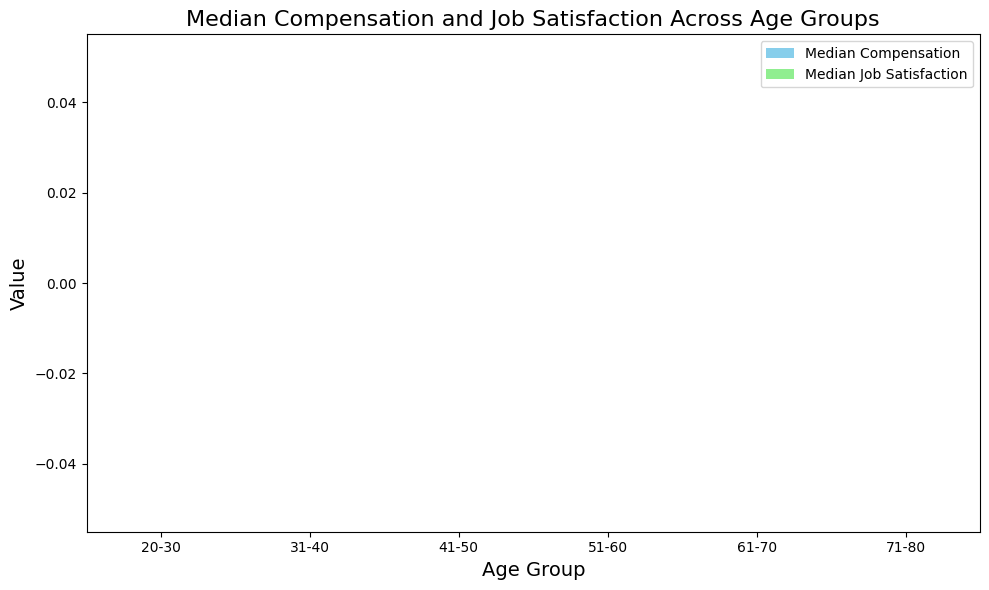

In [13]:
##Write your code here

# Step 1: Create Age Groups (bins)
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the age ranges

# Step 2: Add 'AgeGroup' column to the dataframe
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 3: Clean the data (remove rows with missing values in 'ConvertedCompYearly' and 'JobSatPoints_6')
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Step 4: Calculate the median of compensation and job satisfaction for each age group
median_compensation = df_cleaned.groupby('AgeGroup')['ConvertedCompYearly'].median()
median_job_satisfaction = df_cleaned.groupby('AgeGroup')['JobSatPoints_6'].median()

# Step 5: Combine both metrics into a single DataFrame for visualization
comparison_df = pd.DataFrame({
    'Median Compensation': median_compensation,
    'Median Job Satisfaction': median_job_satisfaction
})

# Step 6: Plot the comparison using a stacked bar chart
ax = comparison_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightgreen'])

# Step 7: Customize the plot
plt.title('Median Compensation and Job Satisfaction Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


In [19]:
# Step 1: Create Age Groups (bins)
bins = [20, 30, 40, 50, 60, 70, 80]  # Define age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Labels for the age ranges

# Step 2: Add 'AgeGroup' column to the dataframe
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Step 3: Clean the data (remove rows with missing values in 'DatabaseWantToWorkWith' and 'AgeGroup')
df_cleaned = df.dropna(subset=['DatabaseWantToWorkWith', 'AgeGroup'])

# Step 4: Split the 'DatabaseWantToWorkWith' column into individual databases
databases_series = df_cleaned['DatabaseWantToWorkWith'].str.split(',', expand=True).stack()

# Step 5: Count the occurrences of each database within each age group
databases_by_age = pd.DataFrame({
    'AgeGroup': df_cleaned['AgeGroup'].repeat(databases_series.groupby(level=0).size()),
    'Database': databases_series.values
})

# Now, we count how many respondents in each age group prefer each database
databases_by_age_counts = databases_by_age.groupby(['AgeGroup', 'Database']).size().unstack(fill_value=0)

# Step 6: Check the data type and ensure it's numeric
print(databases_by_age_counts.dtypes)  # Print data types of columns

# Step 7: Convert to numeric (if not already) and handle any NaN or non-numeric issues
databases_by_age_counts = databases_by_age_counts.apply(pd.to_numeric, errors='coerce', axis=1)

# Step 8: Fill NaN values (if any)
databases_by_age_counts = databases_by_age_counts.fillna(0).astype(int)

# Step 9: Check the structure of the data
print(databases_by_age_counts.head())

# Step 10: Plot the stacked bar chart
try:
    ax = databases_by_age_counts.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
    # Customize the plot
    plt.title('Top Databases Respondents Wish to Learn Across Age Groups', fontsize=16)
    plt.xlabel('Age Group', fontsize=14)
    plt.ylabel('Number of Respondents', fontsize=14)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error during plotting: {e}")


Series([], dtype: object)
Empty DataFrame
Columns: []
Index: []
Error during plotting: no numeric data to plot


/tmp/ipykernel_609/2031444140.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  databases_by_age_counts = databases_by_age.groupby(['AgeGroup', 'Database']).size().unstack(fill_value=0)


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_609/3824916379.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


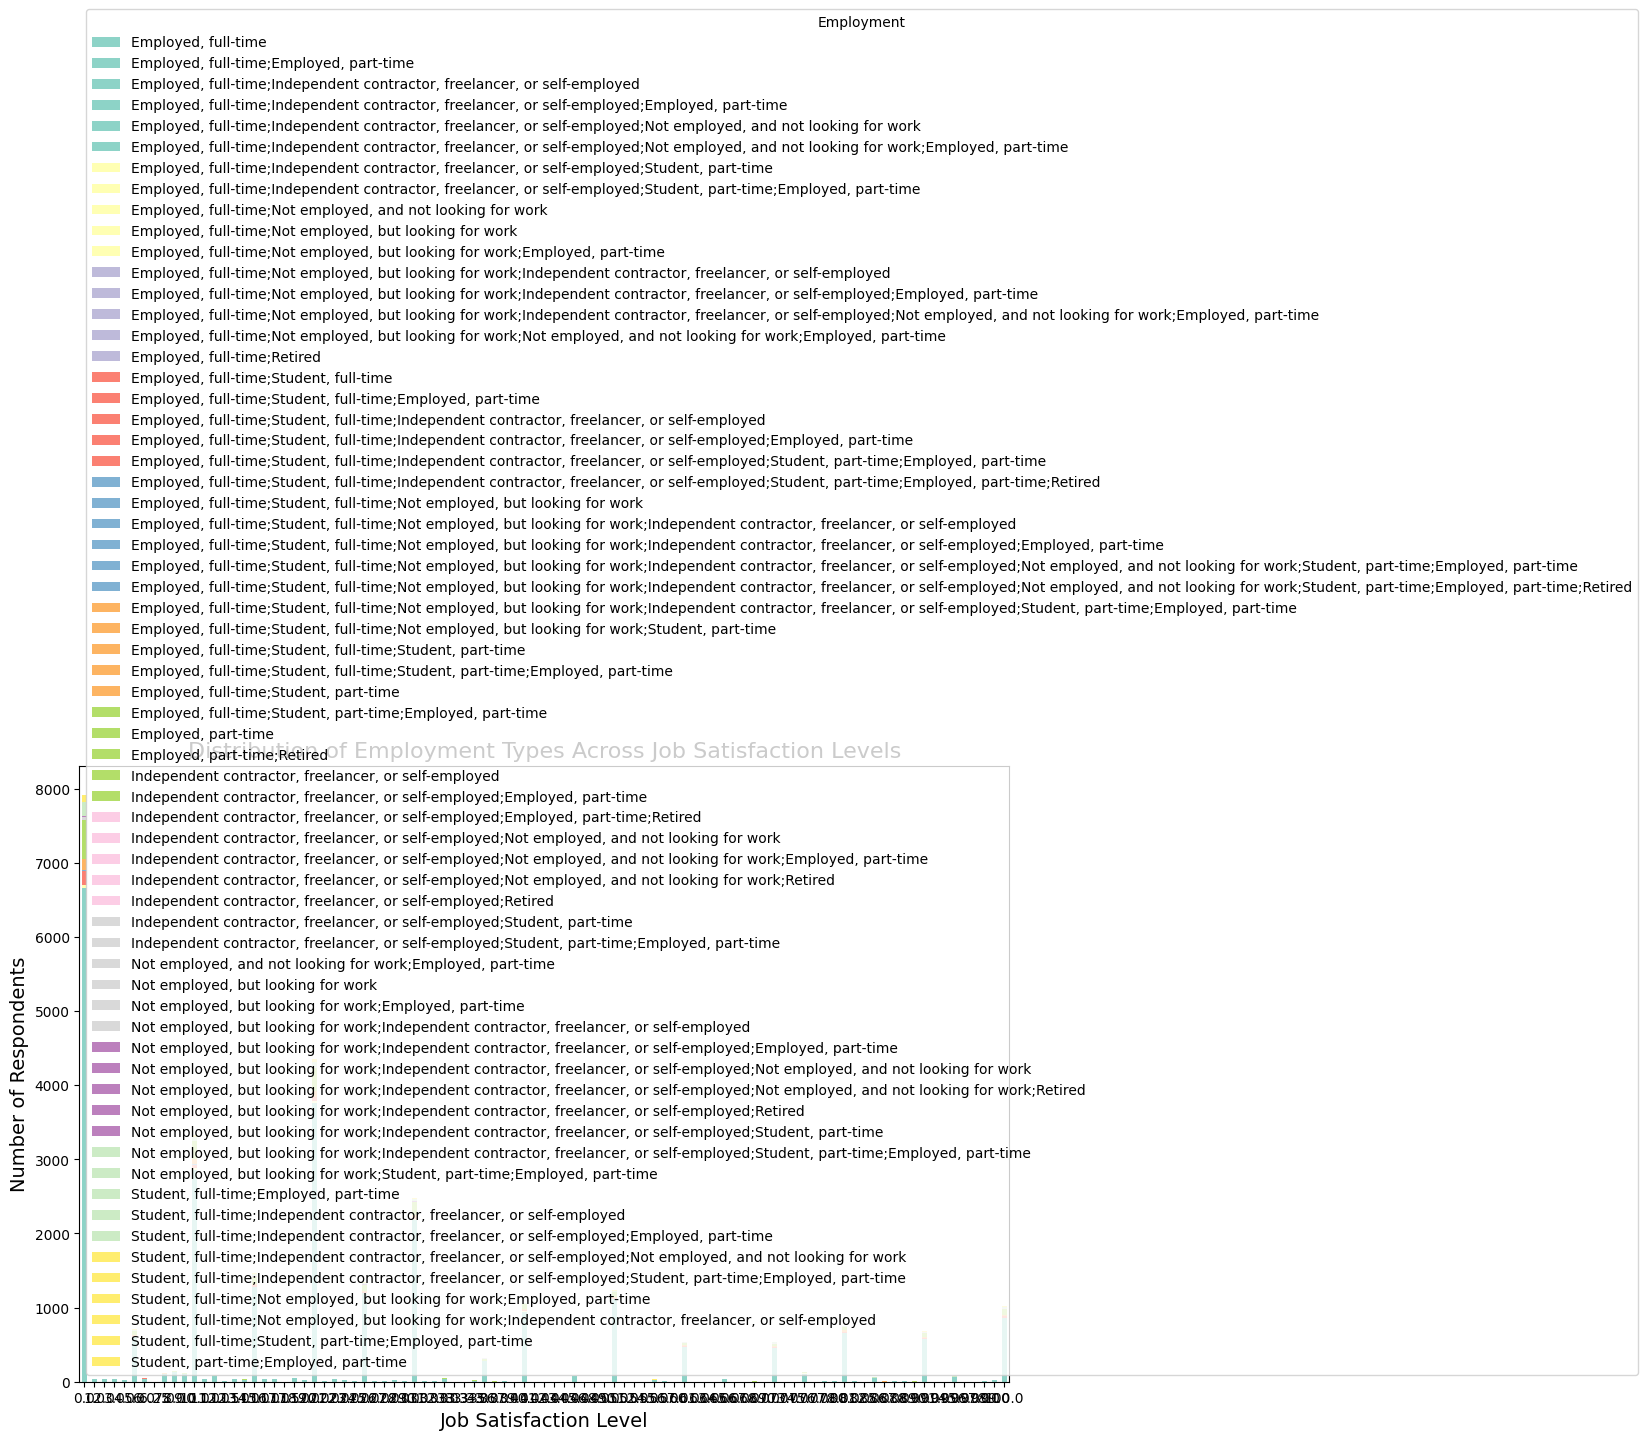

In [20]:
##Write your code here

# Step 1: Clean the data (remove rows with missing values in 'Employment' or 'JobSatPoints_6')
df_cleaned = df.dropna(subset=['Employment', 'JobSatPoints_6'])

# Step 2: Group by JobSatPoints_6 (job satisfaction) and Employment type
employment_by_satisfaction = df_cleaned.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Step 3: Plot the stacked bar chart
ax = employment_by_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')

# Step 4: Customize the plot
plt.title('Distribution of Employment Types Across Job Satisfaction Levels', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [21]:
##Write your code here
# Step 1: Clean the data (remove rows with missing values in 'LanguageAdmired' or 'Age')
df_cleaned = df.dropna(subset=['LanguageAdmired', 'Age'])

# Step 2: Define age groups
bins = [20, 30, 40, 50, 60, 70, 80]  # Age ranges
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80']  # Age group labels
df_cleaned['AgeGroup'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=False)

# Step 3: Split the 'LanguageAdmired' column into individual languages
# First, we will split by commas (since multiple languages can be listed per respondent)
languages_series = df_cleaned['LanguageAdmired'].str.split(',', expand=True).stack()

# Step 4: Group by Age Group and Language to count the frequency
languages_by_age = languages_series.groupby([df_cleaned['AgeGroup']]).value_counts().unstack(fill_value=0)

# Step 5: Plot the data (stacked bar chart)
ax = languages_by_age.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')

# Step 6: Customize the plot
plt.title('Programming Language Preferences Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_609/91676496.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  languages_by_age = languages_series.groupby([df_cleaned['AgeGroup']]).value_counts().unstack(fill_value=0)


TypeError: no numeric data to plot

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [22]:
##Write your code here


# Step 1: Clean the data (remove rows with missing values in 'PlatformAdmired' or 'Employment')
df_cleaned = df.dropna(subset=['PlatformAdmired', 'Employment'])

# Step 2: Split the 'PlatformAdmired' column into individual platforms
# First, we will split by commas (since multiple platforms can be listed per respondent)
platforms_series = df_cleaned['PlatformAdmired'].str.split(',', expand=True).stack()

# Step 3: Group by Employment Type and Platform to count the frequency
platforms_by_employment = platforms_series.groupby([df_cleaned['Employment']]).value_counts().unstack(fill_value=0)

# Step 4: Plot the data (stacked bar chart)
ax = platforms_by_employment.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set2')

# Step 5: Customize the plot
plt.title('Admired Platforms Across Employment Types', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


TypeError: no numeric data to plot

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
